In [11]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
fs, data = wavfile.read('C:\Users\US\Desktop\song1wav.wav')
print(fs)
music_data = data[0:44099]
haarmusic = []
dctmusic =  []
dftmusic = []

44100


In [6]:
def modified_dft(array,L):
    length = len(array)
    i = (length+1-L)/2
    while(i != ((length-1+L)/2)+1):
        array[i]=0
        i+=1
    return array    

In [7]:
def energyerror(arrA,arrB):
    length = len(arrA)
    x = np.subtract(arrA,arrB)
    result =(np.sum(np.square(x)))/length 
    return result

In [8]:
dft = np.fft.fft(music_data)
#dct = np.matmul(matrix_dct,signal)
#haar = np.matmul(haar_matrix,signal)
errordft=[]
#errordct=[]
#errorhaar=[]
for i in range(44099):
    
    dftm = modified_dft(dft,i)
    signalm = np.fft.ifft(dftm)
    errordft.append(np.real(energyerror(music_data,signalm)))
    #dctm = modified_dct(dct,i)
    #signalm = np.matmul(inverse_dct,dctm)
    #errordct.append(np.real(energyerror(signal,signalm)))
    #haarm = modified_haar(haar,i)
    #signalm = np.matmul(haar_inverse,haarm)
    #errorhaar.append(np.real(energyerror(signal,signalm)))

In [9]:
#dftmusic = np.fft.fft(music_data)
#print(np.shape(dftmusic))
#for i in range(44100):
 #   dftmusic[44099-i:44099] = 0
#  idftmusic = np.fft.ifft(dftmusic)


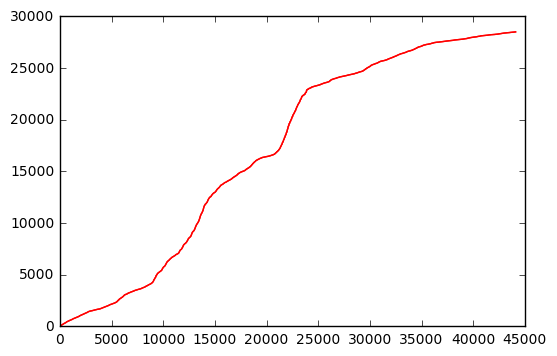

In [13]:
plt.plot(errordft,'r')
plt.show()

In [19]:
from scipy.fftpack import dct, idct

In [20]:
def modified_dct(array,L):
    length = len(array)
    i = length-L
    while(i != length):
        array[i]=0
        i+=1
    return array    

In [21]:
dct = dct(music_data, type=2, norm='ortho')
#dct = np.matmul(matrix_dct,signal)
#haar = np.matmul(haar_matrix,signal)
errordct=[]
#errordct=[]
#errorhaar=[]
for i in range(44099):
    
    dctm = modified_dct(dct,i)
    signalm = idct(dctm, type=2, norm='ortho')
    errordct.append(np.real(energyerror(music_data,signalm)))
    #dctm = modified_dct(dct,i)
    #signalm = np.matmul(inverse_dct,dctm)
    #errordct.append(np.real(energyerror(signal,signalm)))
    #haarm = modified_haar(haar,i)
    #signalm = np.matmul(haar_inverse,haarm)
    #errorhaar.append(np.real(energyerror(signal,signalm))

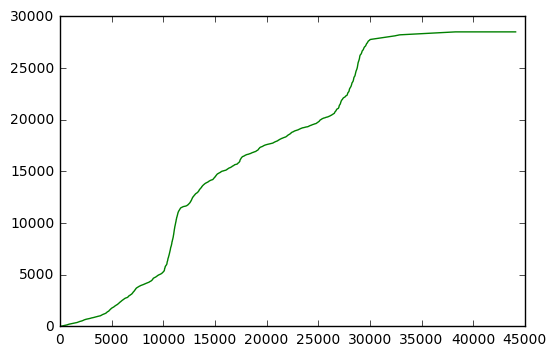

In [23]:
plt.plot(errordct,'g')
plt.show()

In [30]:
import pywt

In [31]:
def modified_haar(array,L):
    length = len(array)
    i = (length-L)
    while(i != length):
        array[i]=0
        i+=1
    return array    

In [32]:
(cA, cD) = pywt.dwt(music_data, 'db1')
#dct = np.matmul(matrix_dct,signal)
#haar = np.matmul(haar_matrix,signal)
errorhaar=[]
#errordct=[]
#errorhaar=[]
for i in range(44099):
    
    haarmca = modified_haar(cA,i)
    haarmcd = modified_haar(cD,i)
    signalm = pywt.idwt(haarmca,haarmcd , 'db1')
    errorhaar.append(np.real(energyerror(music_data,signalm)))
    #dctm = modified_dct(dct,i)
    #signalm = np.matmul(inverse_dct,dctm)
    #errordct.append(np.real(energyerror(signal,signalm)))
    #haarm = modified_haar(haar,i)
    #signalm = np.matmul(haar_inverse,haarm)
    #errorhaar.append(np.real(energyerror(signal,signalm))

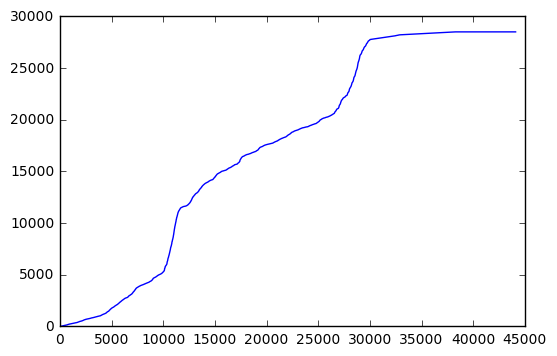

In [33]:
plt.plot(errorhaar,'b')
plt.show()